### conda activate preprocess_data

In [1]:
import openslide
from openslide import open_slide
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import os
import sys

folder_path = "/home/durrlab/Desktop/Anthony/training_data_processing/"
sys.path.append(folder_path)
from processing_functions import *

### Load Data

In [2]:
ndpi_filename = r'OTS-25-25205_2025-07-23_18-10-25_kidn_normal.ndpi'
root = r'/home/durrlab/Desktop/Anthony/data/20251009_Kidney_MUSE-BIT_KidneyNormal1Accepted/FFPE-HE'

wsi = open_slide(os.path.join(root, ndpi_filename))

In [3]:
print(wsi.properties)

<_PropertyMap {'hamamatsu.AHEX[0]': '0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000', 'hamamatsu.AHEX[0].fluorescence': '0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000', 'hamamatsu.AHEX[0].ploidy': '0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000', 'hamamatsu.AHEX[1]': '0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000', 'hamamatsu.AHEX[1].fluorescence': '0000000000000000000000000000000000000000000000

In [4]:
print(wsi.dimensions)
print(wsi.level_dimensions)

(157440, 84480)
((157440, 84480), (78720, 42240), (39360, 21120), (19680, 10560), (9840, 5280), (4920, 2640), (2460, 1320), (1230, 660))


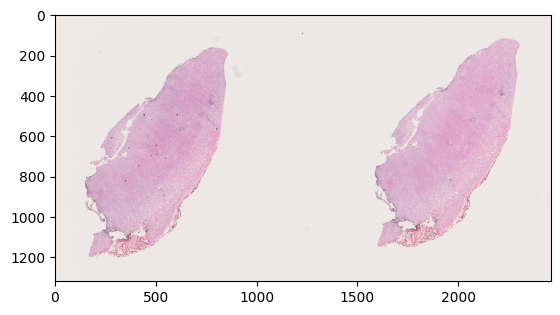

In [5]:
x_start = 0
y_start = 0
wsi_level = 6
level_wsi = wsi.read_region([x_start,y_start], level=wsi_level, size = [round(wsi.level_dimensions[wsi_level][0]), wsi.level_dimensions[wsi_level][1]])

plt.imshow(level_wsi)

### Load pre-selected ROI from .txt file. 

In [7]:
# Magnification Information of the microscope and slide scanner. 

mpp_x = float(wsi.properties.get('openslide.mpp-x', 'nan'))
mpp_y = float(wsi.properties.get('openslide.mpp-y', 'nan'))
objective_power = float(wsi.properties.get('openslide.objective-power', 'nan'))
effective_magnification = float(wsi.properties.get('hamamatsu.Objective.Lens.Magnificant', 'nan'))
print(f"MPP X: {mpp_x} µm/pixel")
print(f"MPP Y: {mpp_y} µm/pixel")
print(f"Objective Power: {objective_power}x")
print(f"Effective Magnification: {effective_magnification}x")

PCO_pixel_size = 6.5 # microns
BIT_magnification = 40
reference_scale = PCO_pixel_size / BIT_magnification
scale_factor_x = mpp_x / reference_scale
scale_factor_y = mpp_x / reference_scale

print(f"x ratio: {scale_factor_x}")
print(f"y ratio: {scale_factor_y}")

MPP X: 0.22034197073858627 µm/pixel
MPP Y: 0.22034197073858627 µm/pixel
Objective Power: 40.0x
Effective Magnification: 35.16x
x ratio: 1.3559505891605308
y ratio: 1.3559505891605308


Top-left: (28736, 46528)
Bottom-right: (36288, 51840)
Width: 7552
Height: 5312


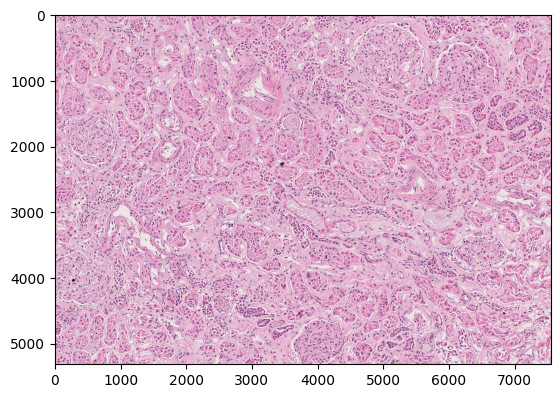

In [27]:
save_path = os.path.join(root, "patches")
roi_name = r"roi_1_2"
roi_x1, roi_y1, roi_x2, roi_y2, width, height = load_roi(os.path.join(save_path, f'{roi_name}.txt'))
# Print the extracted values
print(f"Top-left: ({roi_x1}, {roi_y1})")
print(f"Bottom-right: ({roi_x2}, {roi_y2})")
print(f"Width: {width}")
print(f"Height: {height}")

example = wsi.read_region([roi_x1,roi_y1], 0, [width,height])
plt.imshow(example)

In [28]:
import os
import numpy as np
from PIL import Image

def extract_and_save_random_rois(input_image, output_dir, roi_size=(1903, 2367), num_rois=3, seed=None, prefix="roi"):
    """
    Extracts random ROIs from a PIL image or NumPy array and saves them as .tif files.

    Parameters:
        input_image (PIL.Image or np.ndarray): Input image (grayscale or RGB).
        output_dir (str): Folder where ROIs will be saved.
        roi_size (tuple): Size (height, width) of each ROI.
        num_rois (int): Number of ROIs to extract.
        seed (int): Optional random seed for reproducibility.
        prefix (str): Filename prefix for saved ROIs.
    """
    os.makedirs(output_dir, exist_ok=True)

    # Convert PIL to NumPy array if needed
    if isinstance(input_image, Image.Image):
        input_image = np.array(input_image)

    h, w = input_image.shape[:2]
    roi_h, roi_w = roi_size

    if h < roi_h or w < roi_w:
        raise ValueError(f"Input image is smaller than ROI size {roi_size}.")

    if seed is not None:
        np.random.seed(seed)

    for i in range(num_rois):
        y = np.random.randint(0, h - roi_h + 1)
        x = np.random.randint(0, w - roi_w + 1)
        roi = input_image[y:y+roi_h, x:x+roi_w]

        out_path = os.path.join(output_dir, f"{prefix}_{i+1}.tif")
        Image.fromarray(roi).save(out_path, format='TIFF')
        print(f"Saved ROI to {out_path}")

In [29]:
output_folder = "/home/durrlab/Desktop/Anthony/data/20251009_Kidney_MUSE-BIT_KidneyNormal1Accepted/FFPE-HE"
extract_and_save_random_rois(example, output_folder, roi_size=(1903, 2367), num_rois=3, seed=42, prefix=roi_name)

Saved ROI to /home/durrlab/Desktop/Anthony/data/20251009_Kidney_MUSE-BIT_KidneyNormal1Accepted/FFPE-HE/roi_1_2_1.tif
Saved ROI to /home/durrlab/Desktop/Anthony/data/20251009_Kidney_MUSE-BIT_KidneyNormal1Accepted/FFPE-HE/roi_1_2_2.tif
Saved ROI to /home/durrlab/Desktop/Anthony/data/20251009_Kidney_MUSE-BIT_KidneyNormal1Accepted/FFPE-HE/roi_1_2_3.tif


### Split images into Patches

In [5]:

print("Mode:", example.mode)

Mode: RGBA


(9152, 8960, 3)
(12410, 12149, 3)


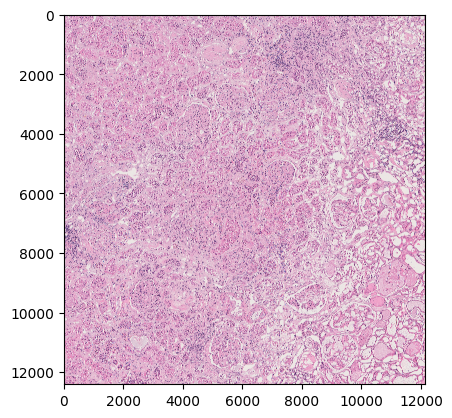

In [61]:
patch_size = (512, 512)
overlap = 0 # number of pixel overlap
img_ext = "tif"
os.makedirs(save_path, exist_ok=True)
save_patch_metadata_txt(ndpi_filename, roi_name, patch_size, overlap, img_ext, roi_x1, roi_y1, roi_x2, roi_y2, width, height, output_path=os.path.join(save_path, f"{roi_name}_patch_metadata.txt"))
image_roi = wsi.read_region([roi_x1,roi_y1], 0, [width,height])
image_roi = image_roi.convert('RGB')
image_roi = np.array(image_roi)
print(np.shape(image_roi))
# rescale H&E Image.
rescaled_image_roi = cv.resize(image_roi, None, fx=scale_factor_x, fy=scale_factor_y, interpolation=cv.INTER_CUBIC)
plt.imshow(rescaled_image_roi)
print(np.shape(rescaled_image_roi))
rescaled_image_roi = Image.fromarray(rescaled_image_roi)
split_image_into_patches(rescaled_image_roi, patch_size, overlap, save_path, handle=roi_name, extension=img_ext)

### Split into Test/Train and Get Patch Statistics. 

In [62]:
import os
import random
import shutil
from pathlib import Path

def split_tif_dataset(input_dir, output_dir, train_ratio=0.9, seed=42):
    # Set seed for reproducibility
    random.seed(seed)

    # Get all .tif files in the input directory
    input_dir = Path(input_dir)
    tif_files = sorted([f for f in input_dir.glob("*.tif")])

    # Shuffle and split
    random.shuffle(tif_files)
    split_index = int(len(tif_files) * train_ratio)
    train_files = tif_files[:split_index]
    test_files = tif_files[split_index:]

    # Prepare output directories
    train_dir = Path(output_dir) / "train"
    test_dir = Path(output_dir) / "test"
    train_dir.mkdir(parents=True, exist_ok=True)
    test_dir.mkdir(parents=True, exist_ok=True)

    # Move files
    for f in train_files:
        shutil.move(str(f), train_dir / f.name)

    for f in test_files:
        shutil.move(str(f), test_dir / f.name)

    print(f"✅ Moved {len(tif_files)} files: {len(train_files)} train, {len(test_files)} test")
    print(f"📂 Files are now in: {train_dir} and {test_dir}")

# Example usage:
# split_tif_dataset("path/to/folder_with_tifs", "path/to/output_dir")

In [63]:
# Moves all tif in to train/test splits
split_tif_dataset(save_path, save_path, train_ratio=0.9, seed=42)


✅ Moved 4502 files: 4051 train, 451 test
📂 Files are now in: /home/durrlab/Desktop/Anthony/data/20251009_Kidney_MUSE-BIT_KidneyNormal1Accepted/FFPE-HE/patches/train and /home/durrlab/Desktop/Anthony/data/20251009_Kidney_MUSE-BIT_KidneyNormal1Accepted/FFPE-HE/patches/test


#### Get the mean and std from the training data. 

In [64]:
import os
import numpy as np
import tifffile as tiff

def compute_rgb_mean_std(folder_path, output_file="image_stats_rgb.txt"):
    tif_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.tif', '.tiff'))]

    channel_sum = np.zeros(3, dtype=np.float32)
    channel_squared_sum = np.zeros(3, dtype=np.float32)
    pixel_count = 0

    for fname in tif_files:
        path = os.path.join(folder_path, fname)
        img = tiff.imread(path)

        # Only process RGB images
        if img.ndim != 3 or img.shape[2] != 3:
            continue

        img = img.astype(np.float32)
        h, w, _ = img.shape
        pixel_count += h * w

        for i in range(3):  # R, G, B
            channel = img[:, :, i]
            channel_sum[i] += np.sum(channel)
            channel_squared_sum[i] += np.sum(channel ** 2)

    if pixel_count == 0:
        raise ValueError("No RGB images found.")

    means = channel_sum / pixel_count
    stds = np.sqrt(channel_squared_sum / pixel_count - means ** 2)

    # Print to terminal
    print("\n📊 RGB Channel Statistics (np.float32, no rescaling):")
    print(f"R mean: {means[0]:.2f}, std: {stds[0]:.2f}")
    print(f"G mean: {means[1]:.2f}, std: {stds[1]:.2f}")
    print(f"B mean: {means[2]:.2f}, std: {stds[2]:.2f}")

    # Save to .txt file
    output_path = os.path.join(folder_path, output_file)
    with open(output_path, "w") as f:
        f.write("RGB Channel Statistics (np.float32, no rescaling)\n")
        f.write(f"R mean: {means[0]:.6f}, std: {stds[0]:.6f}\n")
        f.write(f"G mean: {means[1]:.6f}, std: {stds[1]:.6f}\n")
        f.write(f"B mean: {means[2]:.6f}, std: {stds[2]:.6f}\n")

    print(f"\n📁 Results saved to: {output_path}")
    return means, stds

# Example usage:
# compute_rgb_mean_std("/path/to/your/folder")

In [65]:
compute_rgb_mean_std(os.path.join(save_path, 'train'))


📊 RGB Channel Statistics (np.float32, no rescaling):
R mean: 217.35, std: 34.49
G mean: 174.20, std: 44.05
B mean: 201.90, std: 27.30

📁 Results saved to: /home/durrlab/Desktop/Anthony/data/20251009_Kidney_MUSE-BIT_KidneyNormal1Accepted/FFPE-HE/patches/train/image_stats_rgb.txt


(array([217.35329, 174.19612, 201.90012], dtype=float32),
 array([34.487656, 44.05104 , 27.302273], dtype=float32))

In [66]:
import os
import numpy as np
import tifffile as tiff

def read_rgb_stats(stats_path):
    """Read RGB means and stds from a stats file."""
    with open(stats_path, "r") as f:
        lines = f.readlines()
        means = []
        stds = []
        for line in lines:
            if "mean" in line and "std" in line:
                parts = line.strip().split(",")
                mean = float(parts[0].split(":")[1].strip())
                std = float(parts[1].split(":")[1].strip())
                means.append(mean)
                stds.append(std)
    return np.array(means, dtype=np.float32), np.array(stds, dtype=np.float32)

def normalize_and_save_images(input_folder, output_folder, stats_path):
    """Normalize all RGB .tif images using precomputed mean/std and save as float32."""
    os.makedirs(output_folder, exist_ok=True)
    
    means, stds = read_rgb_stats(stats_path)

    tif_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.tif', '.tiff'))]
    for fname in tif_files:
        in_path = os.path.join(input_folder, fname)
        out_path = os.path.join(output_folder, fname)

        img = tiff.imread(in_path)

        # Skip non-RGB images
        if img.ndim != 3 or img.shape[2] != 3:
            continue

        img = img.astype(np.float32)

        # Normalize per channel
        norm_img = np.empty_like(img, dtype=np.float32)
        for c in range(3):  # R, G, B
            norm_img[:, :, c] = (img[:, :, c] - means[c]) / stds[c]

        # Save as float32 TIFF
        tiff.imwrite(out_path, norm_img.astype(np.float32))

        #print(f"✅ Saved normalized: {out_path}")

# Example usage:
# normalize_and_save_images("input_folder", "normalized_output_folder", "image_stats_rgb.txt")

#### Normalize with the Training distribution mean and std. 

In [67]:
normalize_and_save_images(os.path.join(save_path, 'train'), os.path.join(save_path, 'normalized_train', 'image_stats.txt'), os.path.join(save_path, 'train', "image_stats_rgb.txt"))

In [69]:
normalize_and_save_images(os.path.join(save_path, 'test'), os.path.join(save_path, 'normalized_test', 'image_stats.txt'), os.path.join(save_path, 'train', "image_stats_rgb.txt"))

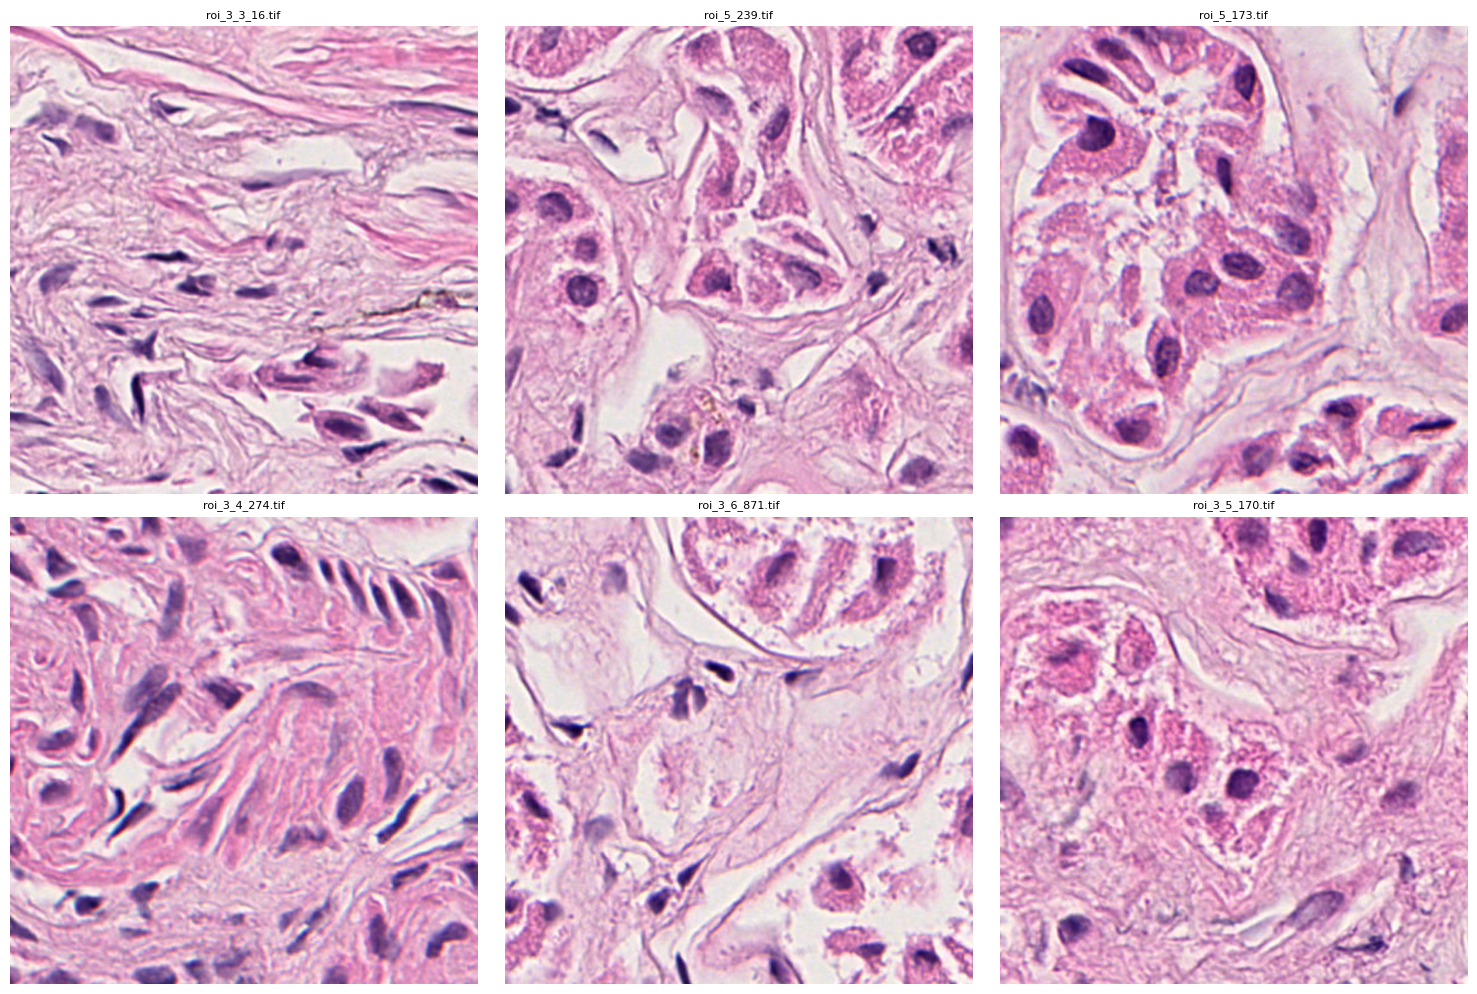

In [70]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tiff

def rescale_to_uint8(image):
    """Rescales image to [0, 255] and converts to uint8."""
    image = image.astype(np.float32)
    min_val = np.min(image)
    max_val = np.max(image)
    if max_val > min_val:
        image = (image - min_val) / (max_val - min_val) * 255.0
    else:
        image = np.zeros_like(image)
    return image.astype(np.uint8)

def show_tiff_collage(folder_path, num_images=6, rows=2, cols=3):
    # Get all .tif or .tiff files
    tiff_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.tif', '.tiff'))]

    if len(tiff_files) < num_images:
        raise ValueError(f"Not enough .tif files in the folder ({len(tiff_files)} found).")

    # Randomly sample files
    selected_files = random.sample(tiff_files, num_images)

    # Create subplot grid
    fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
    axes = axes.flatten()

    for ax, fname in zip(axes, selected_files):
        img_path = os.path.join(folder_path, fname)
        img = tiff.imread(img_path)
        img = rescale_to_uint8(img)

        # Show grayscale or RGB appropriately
        if img.ndim == 2:
            ax.imshow(img, cmap='gray')
        else:
            ax.imshow(img)

        ax.set_title(fname, fontsize=8)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage:
# show_tiff_collage("splits/train")

# Example usage:
# show_tiff_collage("/path/to/patches")
show_tiff_collage(os.path.join(save_path, 'train'))